# String simulator results analysis

In [15]:
from matplotlib import pyplot as plt
from matplotlib import animation as ani
import numpy as np
import scipy as sp

import time
import pickle

## Load simulation results

In [16]:
with open("open.dat", "rb") as f:
    s_open = pickle.load(f)

with open("palm.dat", "rb") as f:
    s_palm = pickle.load(f)

with open("harm.dat", "rb") as f:
    s_harm = pickle.load(f)

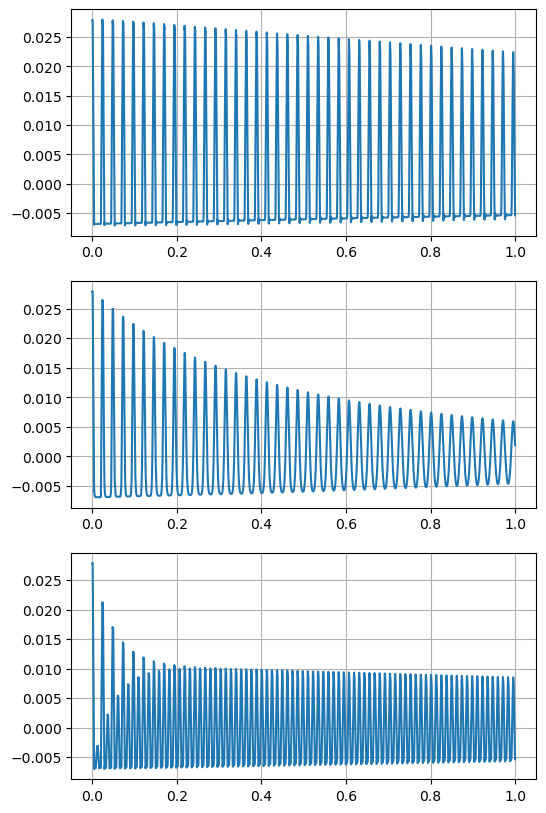

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(6, 10))

ax1.plot(s_open["t"], s_open["y"][400,:])
ax2.plot(s_palm["t"], s_palm["y"][400,:])
ax3.plot(s_harm["t"], s_harm["y"][400,:])

for a in (ax1, ax2, ax3):
    a.grid(True)

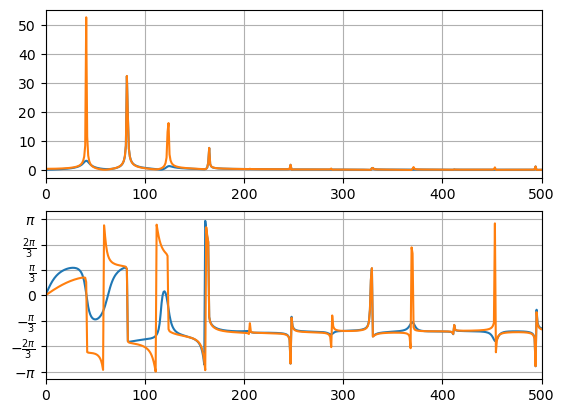

In [23]:
f, (ax1, ax2) = plt.subplots(nrows=2)

ft=sp.fft.fft(s_harm["y"][400,:])
ft2=sp.fft.fft(s_open["y"][400,:])

ax1.plot(np.absolute(ft))
ax1.plot(np.absolute(ft2))
ax2.plot(np.angle(ft))
ax2.plot(np.angle(ft2))
ax1.set_xlim(left=0, right=500)
ax2.set_xlim(left=0, right=500)

ax2.set_yticks(np.pi*np.array([-1, -0.66, -0.33, 0, 0.33, 0.66, 1]), [r"$-\pi$", r"$-\frac{2\pi}{3}$", r"$-\frac{\pi}{3}$", "0", r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$"])

ax1.grid(True)
ax2.grid(True)